In [1]:
#importing libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading and loading data
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
data.groupby('Dataset').describe()

Age                                                     \
         count       mean        std  min   25%   50%   75%   max   
Dataset                                                             
1        333.0  46.675676  15.117310  8.0  34.0  47.0  58.0  78.0   
2        133.0  41.932331  16.646137  4.0  28.0  41.0  56.0  85.0   

        Alamine_Aminotransferase             ...  Total_Bilirubin        \
                           count        mean ...              75%   max   
Dataset                                      ...                          
1                          333.0  101.735736 ...              3.8  75.0   
2                          133.0   34.804511 ...              1.2   7.3   

        Total_Protiens                                               
                 count      mean       std  min  25%  50%  75%  max  
Dataset                                                              
1                333.0  6.457958  1.111321  2.7  5.7  6.5  7.2  9.6  
2                133.0  6.576692  1.057648  3.7  5.9  6.7  7.3  8.5  

[2 rows x 72 columns]

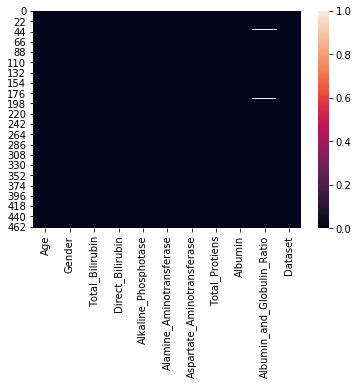

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.shape

(466, 11)

In [7]:
#droppped the null values there were 3 null values

data=data.dropna()
data.shape


(463, 11)

In [8]:
#indind correlation of different features with dataset
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.016519,0.003891,0.110840,-0.067595,0.005517,-0.199145,-0.278243,-0.221264,-0.132859
Total_Bilirubin,0.016519,1.000000,0.865944,0.152563,0.201516,0.227341,0.007998,-0.210753,-0.188128,-0.217805
Direct_Bilirubin,0.003891,0.865944,1.000000,0.185906,0.235222,0.260217,0.025153,-0.212337,-0.173758,-0.244710
Alkaline_Phosphotase,0.110840,0.152563,0.185906,1.000000,0.099927,0.150559,-0.020949,-0.162802,-0.239228,-0.186383
Alamine_Aminotransferase,-0.067595,0.201516,0.235222,0.099927,1.000000,0.784172,-0.032339,-0.009111,0.015321,-0.157366
Aspartate_Aminotransferase,0.005517,0.227341,0.260217,0.150559,0.784172,1.000000,-0.015526,-0.074725,-0.059750,-0.148565
Total_Protiens,-0.199145,0.007998,0.025153,-0.020949,-0.032339,-0.015526,1.000000,0.772154,0.215055,0.043182
Albumin,-0.278243,-0.210753,-0.212337,-0.162802,-0.009111,-0.074725,0.772154,1.000000,0.673159,0.177963
Albumin_and_Globulin_Ratio,-0.221264,-0.188128,-0.173758,-0.239228,0.015321,-0.059750,0.215055,0.673159,1.000000,0.172084
Dataset,-0.132859,-0.217805,-0.244710,-0.186383,-0.157366,-0.148565,0.043182,0.177963,0.172084,1.000000


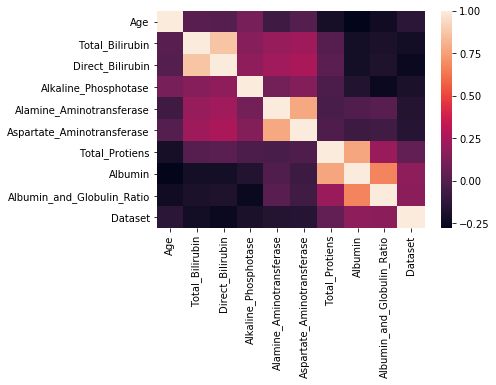

In [9]:
#heatmap
corr = data.corr()
sns.heatmap(corr)

C:\Users\AA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


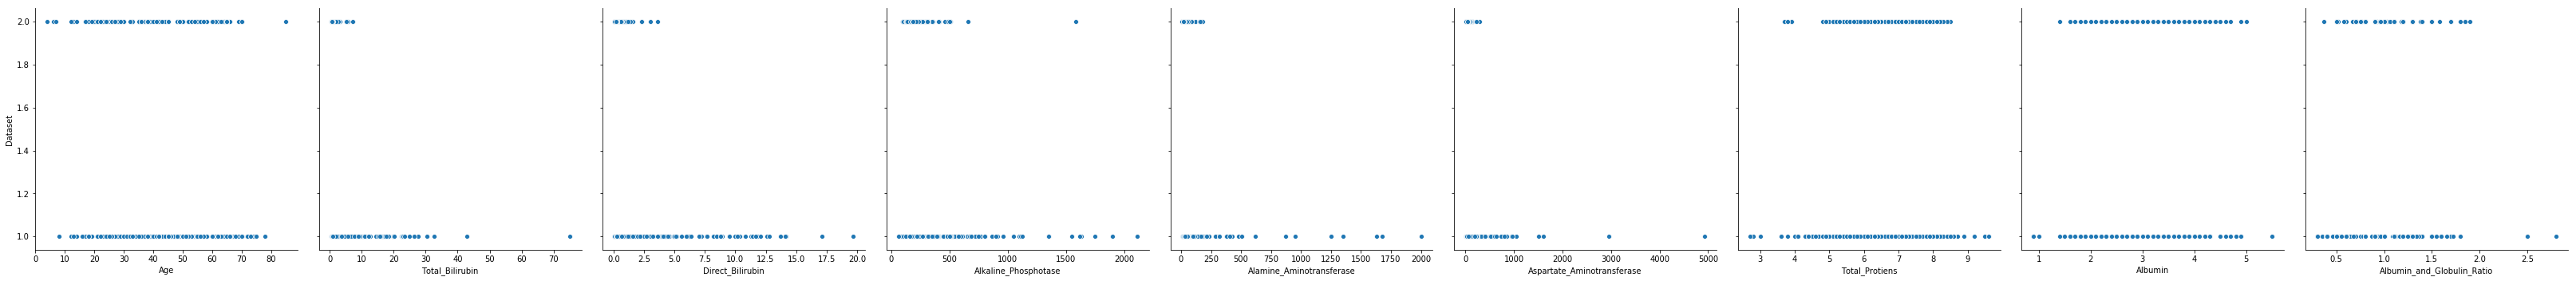

In [10]:
sns.pairplot(data, x_vars=['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], y_vars='Dataset', size=5)

In [11]:
#dropping 'Direct_Bilirubin','Alkaline_Phosphotase'

In [12]:
X=data[['Age','Gender','Total_Bilirubin','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]
y=data.iloc[:,-1]

In [13]:
X.head()

,Age,Gender,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,60,Male,6.3,118,114,6.6,3.7,1.27
1,31,Female,0.8,21,16,6.0,3.0,1.00
2,60,Male,19.6,46,52,6.1,2.0,0.40
3,34,Male,8.7,58,138,5.8,2.4,0.70
4,26,Female,0.9,16,12,7.0,3.5,1.00


In [14]:
#handling categorical data and dummy variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X['Gender'] = labelencoder_X.fit_transform(X['Gender'])
onehotencoder = OneHotEncoder(categorical_features = ['Gender'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=0)


C:\Users\AA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


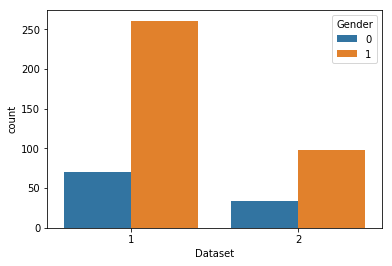

In [15]:
sns.countplot(data.Dataset, hue=X.Gender)

In [16]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier=   KNeighborsClassifier(n_neighbors=10, metric='minkowski' , p=2)
# classifier.fit(X_train,y_train)
# y_pred=classifier.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_pred,y_test)


In [17]:
# from sklearn.linear_model import LogisticRegression
# classifier1=  LogisticRegression(random_state=0)
# classifier1.fit(X_train,y_train)
# y_pred= classifier1.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_pred,y_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier1= RandomForestClassifier( n_estimators=100, criterion="entropy")
classifier1.fit(X_train,y_train)
y_pred= classifier1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7189542483660131

# final

In [19]:
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.7843137254901961

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.78      1.00      0.87       115
          2       1.00      0.13      0.23        38

avg / total       0.83      0.78      0.72       153



# changes made to testing data

In [21]:
Prediction = pd.read_csv('test.csv')
Prediction=Prediction.dropna()
newX=Prediction[['Age','Gender','Total_Bilirubin','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
newX['Gender'] = labelencoder_X.fit_transform(newX['Gender'])
onehotencoder = OneHotEncoder(categorical_features = ['Gender'])
newX.head()


C:\Users\AA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Gender,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,31,40,7.3,3.8,1.10
1,15,1,0.8,25,66,6.1,3.7,1.50
2,66,0,4.2,15,30,7.1,2.2,0.40
3,32,1,0.6,45,31,7.5,4.3,1.34
4,60,1,2.6,42,37,5.4,2.7,1.00


In [22]:

classifier= SVC()
classifier.fit(X,y)
newy_pred= classifier.predict(newX)
newy_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

# exporting

In [23]:
new = pd.Series(newy_pred)
Answer = pd.concat([Prediction, new], axis=1)
Answer.rename(columns={0: 'Prediction'}, inplace=True)
export_csv = Answer.to_csv (r'C:\Users\AA\Desktop\Assignment 3\Assignment 2\problem_1\answer1.csv', index = None, header=True)

# So the RandomForest and Svm were giving better result naive bayes,kneighbors,decision trees failed!